# Facenet features space exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imagine.color import conversion

In [2]:
df = pd.read_csv("preprocessed/facenet.csv", na_values=-1).dropna().convert_dtypes()
df

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,lipstick_b,eyeshadow0_r,eyeshadow0_g,eyeshadow0_b,eyeshadow1_r,eyeshadow1_g,eyeshadow1_b,eyeshadow2_r,eyeshadow2_g,eyeshadow2_b
0,Y5tXWR-HxIE,0.024927,-0.026071,-0.065685,0.018033,0.025346,-0.063682,-0.055645,0.073852,0.030944,...,112,91,58,58,147,90,95,178,113,114
1,ceM4SWRN7gQ,0.050460,-0.032096,-0.007994,0.030874,-0.006151,-0.054682,-0.067442,0.039475,0.001549,...,108,99,69,68,132,96,92,154,122,118
2,zIOsONcP3NA,-0.024352,-0.022826,-0.101227,0.011569,0.048275,-0.023218,-0.026633,0.074966,0.013348,...,94,98,48,52,163,104,100,228,186,158
3,hq0XHCzqpHo,-0.041779,-0.025077,-0.095615,-0.004861,0.061220,-0.024777,0.008065,0.044618,0.047160,...,70,103,68,58,141,103,87,173,132,111
4,-JVMq8HxIHc,-0.013519,-0.015275,-0.062081,0.020171,0.036441,-0.098690,-0.056205,0.054526,0.051860,...,75,111,84,67,164,135,109,227,205,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,bMnxopJTyfE,-0.054869,-0.019020,-0.023625,0.031734,0.090941,-0.046029,-0.041448,0.008237,0.072028,...,113,110,70,64,152,100,93,186,129,122
971,VDYiY0xJcwg,-0.004980,-0.033937,-0.097180,0.006983,0.046345,-0.039666,-0.046201,0.078051,0.018623,...,50,104,64,60,155,111,98,198,153,133
972,n4qrvT-nHEY,-0.030299,-0.014946,-0.124062,0.000513,0.048781,-0.014094,-0.008754,0.062816,0.030083,...,118,88,57,53,144,111,102,215,190,170
973,yYzbCfHLuN8,-0.036126,0.010350,-0.109600,-0.007722,0.043399,0.000231,0.000921,0.066382,0.035853,...,120,126,69,64,166,103,93,202,140,124


In [3]:
face_features = df.iloc[:, 1:513]
makeup_features = df.iloc[:, 513:]

In [4]:
parts = {
    "lipstick" : makeup_features.iloc[:, 0:3],
    "eyeshadow" : makeup_features.iloc[:, 3:6]
}

In [5]:
from sklearn.manifold import TSNE
k=2
dimensionality_reductor = TSNE(n_components=k)
face_features_reduced = pd.DataFrame(dimensionality_reductor.fit_transform(face_features), columns=[str(i) for i in range(k)])

In [6]:
def show_feature_space(df, scale=15, name=None, colors=None):
    plt.figure(figsize=(scale, scale))
    if colors is not None:
        sns.scatterplot(x=df.columns[0], y=df.columns[1], data=face_features_reduced, c=colors)
    else:
        sns.scatterplot(x=df.columns[0], y=df.columns[1], data=face_features_reduced)
    if name is not None:
        plt.suptitle(name)
    plt.tight_layout()
    plt.show()

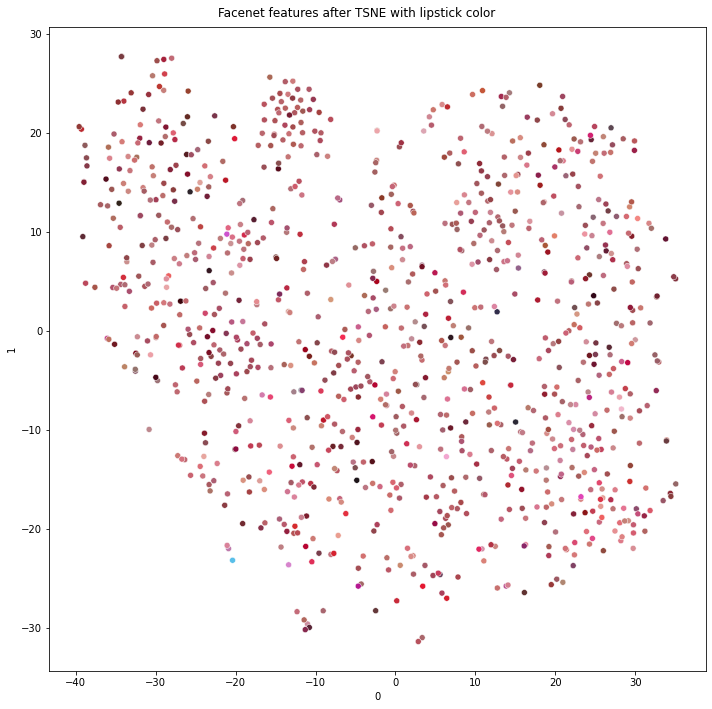

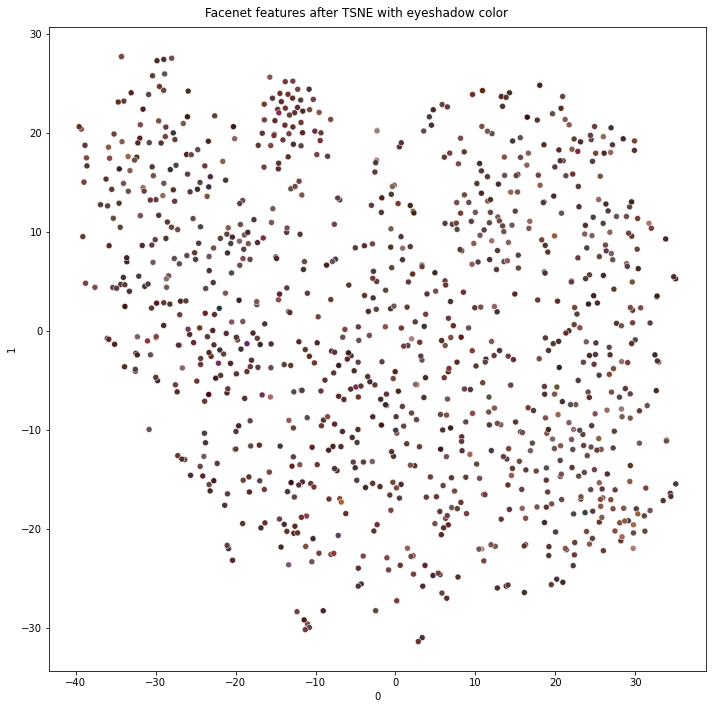

In [7]:
for p in parts:
    show_feature_space(face_features_reduced,
                       scale=10,
                       name="Facenet features after {} with {} color".format(type(dimensionality_reductor).__name__ ,p), 
                       colors=parts[p].values/255.)